# Ejemplo de naive bayes gaussiano

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

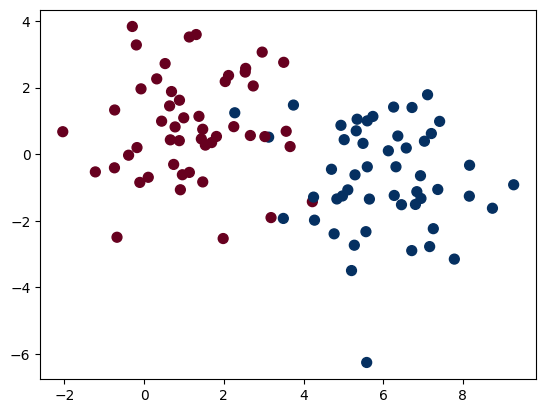

In [15]:
X, y = make_blobs(100, 2, centers=2,random_state=449,
cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='RdBu');

(np.float64(-2.6091435066459017),
 np.float64(9.841673261277172),
 np.float64(-6.765062625042671),
 np.float64(4.343519482862512))

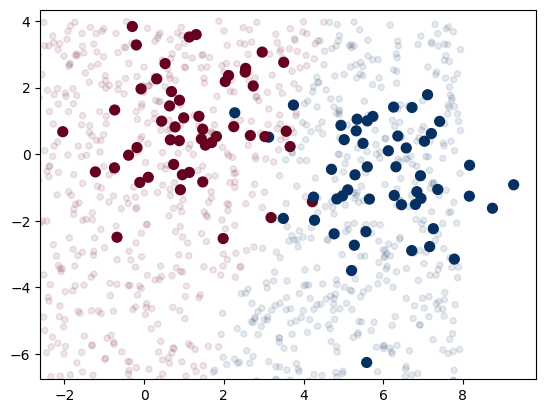

In [16]:
modelo = GaussianNB()
modelo.fit(X, y);
# Ahora generamos nuevos datos y predecimos su etiqueta
rng = np.random.RandomState(0)
nuevo_X = [-6, -14] + [14, 18] * rng.rand(2000, 2)
nuevo_y = modelo.predict(nuevo_X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
limite = plt.axis()
plt.scatter(nuevo_X[:, 0], nuevo_X[:, 1], c=nuevo_y, s=20, cmap='RdBu', alpha=0.1)
plt.axis(limite)

In [17]:
y_proba = modelo.predict_proba(nuevo_X)
print(y_proba[-8:].round(2)) # salida: [[ 0.89, 0.11], [1. , 0.], … [0.15, 0.85]]

[[1.   0.  ]
 [1.   0.  ]
 [0.54 0.46]
 [0.94 0.06]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]]


In [18]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=675)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Hay %d ejemplos mal clasificados de %d" % ((y_test != y_pred).sum(), X_test.shape[0]) )

Hay 0 ejemplos mal clasificados de 75


In [19]:
datos = fetch_20newsgroups()
print(datos.target_names)
# Las clases que tiene el target
categorias = ['talk.religion.misc', 'soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categorias)
test = fetch_20newsgroups(subset='test', categories=categorias)
print(train.data[5])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919

In [20]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [22]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(113.92222222222219, 0.5, 'Label predicha')

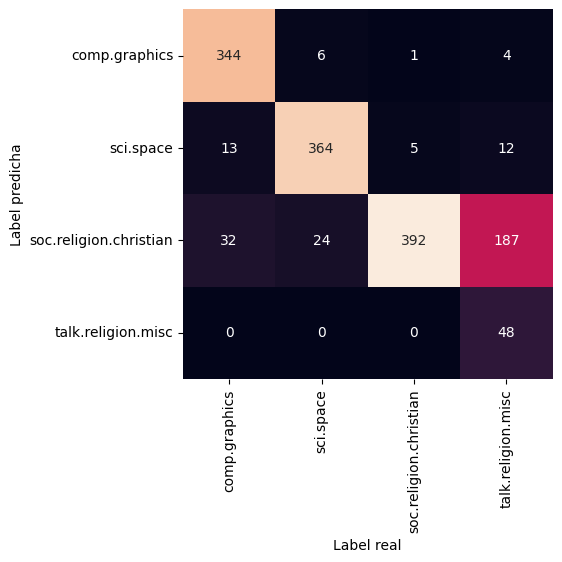

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mc = confusion_matrix(test.target, labels)
sns.heatmap(mc.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Label real')
plt.ylabel('Label predicha')


In [24]:
def predice_categoria(texto, train=train, model=model):
    pred = model.predict([texto])
    return train.target_names[pred[0]]

In [29]:
print(predice_categoria('sending a payload to the ISS'))
print(predice_categoria('discussing islam vs atheism'))
print(predice_categoria('determining the screen resolution'))
#'sci.space'
#'soc.religion.christian'
#'comp.graphics'
print(predice_categoria('a sea star on the bottom of the sea'))

sci.space
soc.religion.christian
comp.graphics
sci.space
